<a href="https://colab.research.google.com/github/tranthuc99/project2/blob/main/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import thư viện

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from keras.models import Sequential, save_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import time
import tarfile
import os

## 2. Load và tiền xử lý dữ liệu

### 2.1 Load dữ liệu

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### Khám phá dữ liệu

In [4]:
print("Số lượng ảnh trong tập đào tạo: ", y_train.shape[0])
print("Số lượng ảnh trong tập kiểm định: ", y_test.shape[0])

labels = ['Plane', 'Car', 'Bird', 'Cat','Deer',
          'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
_ , countsTrain = np.unique(y_train, return_counts=True)
_ , countsTest = np.unique(y_test, return_counts=True)

print("Thống kê số lượng ảnh trong mỗi 1 nhãn, của tập huấn luyện và đào tạo lần lượt:")
for i in range(len(labels)):
  print(labels[i], ':', countsTrain[i], '-', countsTest[i])

Số lượng ảnh trong tập đào tạo:  50000
Số lượng ảnh trong tập kiểm định:  10000
Thống kê số lượng ảnh trong mỗi 1 nhãn, của tập huấn luyện và đào tạo lần lượt:
Plane : 5000 - 1000
Car : 5000 - 1000
Bird : 5000 - 1000
Cat : 5000 - 1000
Deer : 5000 - 1000
Dog : 5000 - 1000
Frog : 5000 - 1000
Horse : 5000 - 1000
Ship : 5000 - 1000
Truck : 5000 - 1000


#### Trực quan hóa dữ liệu

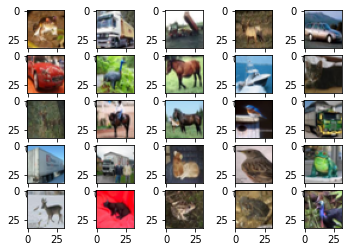

In [ ]:
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k])
        k += 1
plt.show()

### 2.2 Tiền xử lý dữ liệu


*   Chuyển từ số nguyên sang số thực
*   Chuẩn hóa về khoảng (0;1)
*   one-hot encode y_train và y_test
*   Data Augmentation



In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

nClasses = 10
y_train = to_categorical(y_train, nClasses)
y_test = to_categorical(y_test, nClasses)

datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(x_train, y_train, batch_size=256)

## 3. Định nghĩa và train mô hình



*   Kiến trúc mạng
*   compile model
*   fit model



In [ ]:
input_shape = (32,32,3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_28 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_29 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 250
history = model.fit(it_train, epochs= epochs,
                    validation_data=(x_test, y_test), verbose=1,
                    steps_per_epoch=50, validation_steps=10)

Epoch 1/250
50/50 [==============================] - 94s 2s/step - loss: 2.7119 - accuracy: 0.2111 - val_loss: 2.3820 - val_accuracy: 0.1110
Epoch 2/250
50/50 [==============================] - 93s 2s/step - loss: 2.1199 - accuracy: 0.2798 - val_loss: 2.6371 - val_accuracy: 0.1004
Epoch 3/250
50/50 [==============================] - 93s 2s/step - loss: 1.9287 - accuracy: 0.3221 - val_loss: 2.8875 - val_accuracy: 0.1019
Epoch 4/250
50/50 [==============================] - 93s 2s/step - loss: 1.8046 - accuracy: 0.3591 - val_loss: 3.1034 - val_accuracy: 0.1150
Epoch 5/250
50/50 [==============================] - 97s 2s/step - loss: 1.7010 - accuracy: 0.3875 - val_loss: 3.0993 - val_accuracy: 0.1359
Epoch 6/250
50/50 [==============================] - 97s 2s/step - loss: 1.6138 - accuracy: 0.4151 - val_loss: 3.2133 - val_accuracy: 0.1687
Epoch 7/250
50/50 [==============================] - 98s 2s/step - loss: 1.5705 - accuracy: 0.4420 - val_loss: 2.8206 - val_accuracy: 0.1990
Epoch 8/250
5

## 4. Đánh giá mô hình



*   Accuracy curve
*   Loss curve
*   Confusion matrix
*   precision, recall, f1-score



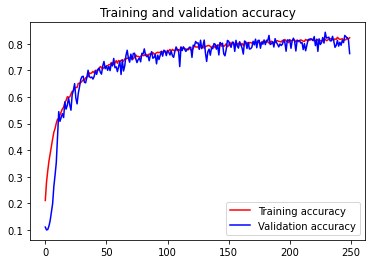

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

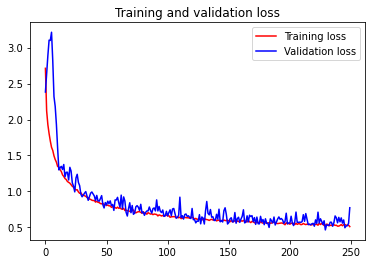

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(x_test, batch_size=50)
labels = ['Plane', 'Car', 'Bird', 'Cat','Deer',
          'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
predY = []
testY = []
for i in range(1000):
  y_p = np.argmax(y_pred[i])
  y_t = np.argmax(y_test[i])
  predY.append(y_p)
  testY.append(y_t)

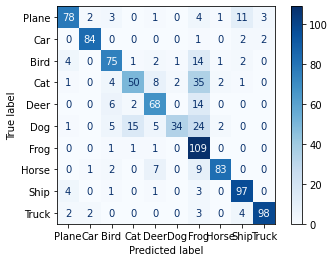

In [ ]:
cm = confusion_matrix(testY, predY)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(testY, predY, target_names=labels))

              precision    recall  f1-score   support

       Plane       0.87      0.76      0.81       103
         Car       0.94      0.94      0.94        89
        Bird       0.77      0.75      0.76       100
         Cat       0.72      0.49      0.58       103
        Deer       0.73      0.76      0.74        90
         Dog       0.92      0.40      0.55        86
        Frog       0.50      0.97      0.66       112
       Horse       0.93      0.81      0.87       102
        Ship       0.83      0.92      0.87       106
       Truck       0.95      0.90      0.92       109

    accuracy                           0.78      1000
   macro avg       0.82      0.77      0.77      1000
weighted avg       0.81      0.78      0.77      1000



## 5. Lưu mô hình



*   Lưu mô hình dưới định dạng tf
*   Nén mô hình .tar.gz



In [ ]:
ts = int(time.time())
file_path = f"tfs/cnncifar10/{ts}/"
model.save(filepath=file_path, save_format='tf')

INFO:tensorflow:Assets written to: tfs/cnncifar10/1642252308/assets


In [ ]:
def tar_folder(output_filename: str, source_dir: str):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

OUT_FILE = 'tfs.tar.gz'

SOURCE_FILE = "tfs"

tar_folder(output_filename=OUT_FILE, source_dir=SOURCE_FILE)